# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
df_cluster = pd.read_csv('/content/drive/MyDrive/Dataset/Kesejahteraan Pekerja/clustering.csv')

df_cluster

,gk,ump,peng,jenis,daerah,Cluster
0,293697.0,1900000.0,466355.0,MAKANAN,PERKOTAAN,0
1,302128.0,1900000.0,466355.0,MAKANAN,PERKOTAAN,0
2,306243.0,2118500.0,548853.0,MAKANAN,PERKOTAAN,0
3,319768.0,2118500.0,548853.0,MAKANAN,PERKOTAAN,0
4,297479.0,1900000.0,395136.0,MAKANAN,PERDESAAN,0
...,...,...,...,...,...,...
4987,513170.0,2729463.0,1028896.0,TOTAL,PERDESAAN,2
4988,472525.0,2684743.0,1264589.0,TOTAL,PERDESAANPERKOTAAN,2
4989,486168.0,2684743.0,1264589.0,TOTAL,PERDESAANPERKOTAAN,2
4990,505468.0,2729463.0,1327782.0,TOTAL,PERDESAANPERKOTAAN,2


encoding

In [3]:
#Mengubah data categorical menjadi numerik menggunakan label encoding
Lbl = LabelEncoder()
categorical_columns = [column for column in df_cluster.columns if df_cluster[column].dtype == "O"]

mapping_dict = {}

for column in categorical_columns:
    df_cluster[column] = Lbl.fit_transform(df_cluster[column])
    unique_values = list(Lbl.classes_)
    transformed_values = list(range(len(unique_values)))
    mapping_dict[column] = dict(zip(transformed_values, unique_values))

for column, mapping in mapping_dict.items():
    print(f"\nMapping untuk kolom '{column}':")
    for transformed, original in mapping.items():
        print(f"{transformed} -> {original}")


Mapping untuk kolom 'jenis':
0 -> MAKANAN
1 -> NONMAKANAN
2 -> TOTAL

Mapping untuk kolom 'daerah':
0 -> PERDESAAN
1 -> PERDESAANPERKOTAAN
2 -> PERKOTAAN


<Axes: >

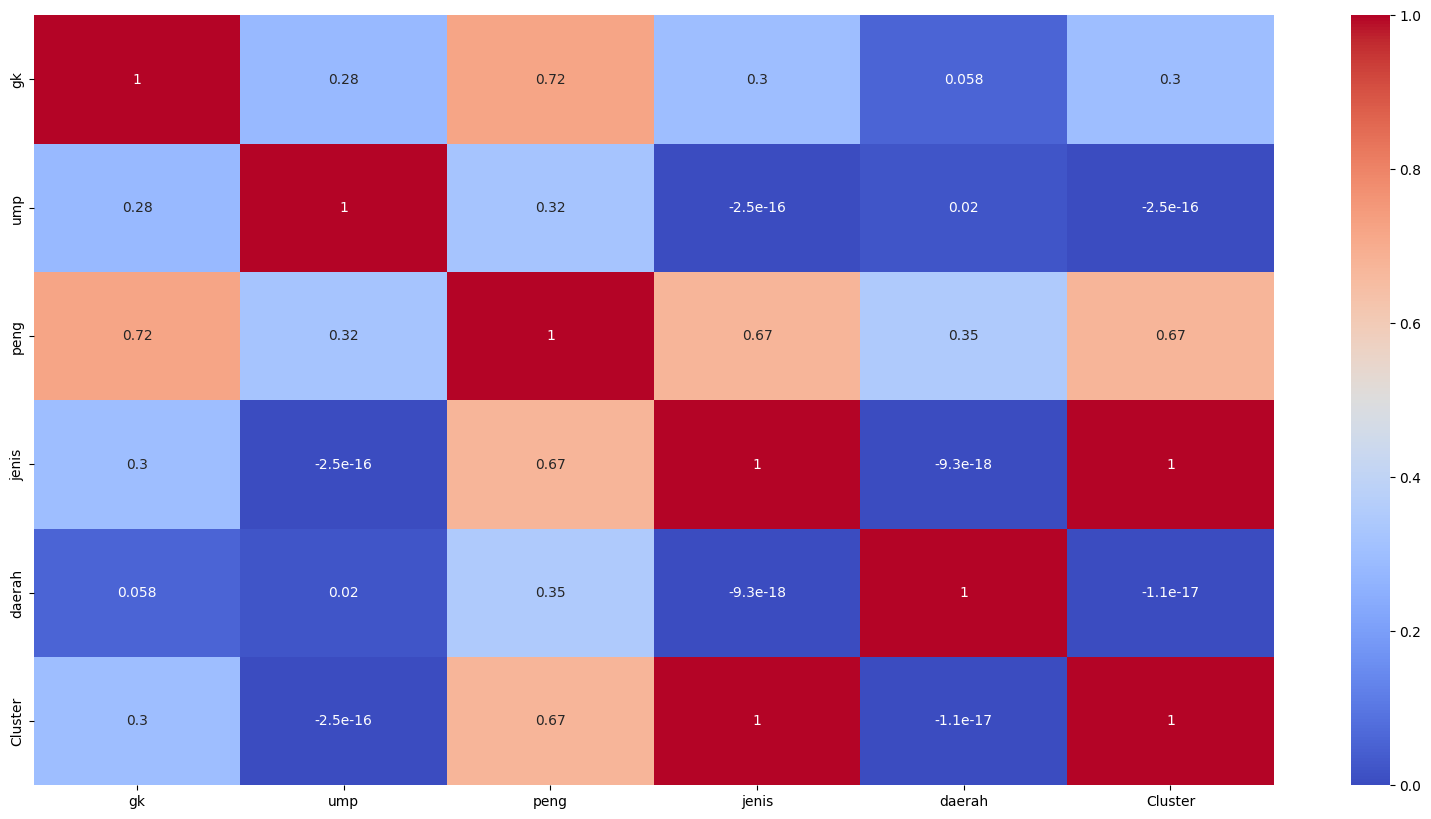

In [4]:
#Visualisasi korelasi hubungan antar kolom dataset
plt.figure(figsize=(20,10))
sns.heatmap(df_cluster.corr(),annot=True,cmap="coolwarm")

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
#Memisahkan antara kolom fitur(X) dan kolom label(y)
X = df_cluster.copy().drop(columns = 'Cluster')
y = df_cluster['Cluster']

In [6]:
#Membagi data pelatihan dan pengujian (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [7]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=100)
lr_model = lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

In [8]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model = dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

Pada tahap klasifikasi saya memilih algoritma Logistic Regression dan Decision Tree karena kedua algoritma ini dapat memberikan hasil yang efisien untuk dataset yang saya gunakan dimana Logistic Regression bekerja dengan probabilitas berdasarkan garis pemisah linear sedangkan Decision Tree membagi data dengan memanfaatkan struktur pohon untuk menangani hubungan non-linear

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
#Evaluasi hasil skor pelatihan dan pengujian pada model
def print_score(model, X_train, y_train, X_test, y_test, model_name):
    score_train = model.score(X_train, y_train)
    score_test = model.score(X_test, y_test)

    print(f"{model_name} Score:")
    print(f"Train Score : {score_train}")
    print(f"Test Score : {score_test}\n")

print_score(lr_model, X_train, y_train, X_test, y_test, 'Logistic Regression')
print_score(dt_model, X_train, y_train, X_test, y_test, 'Decision Tree')

Logistic Regression Score:
Train Score : 0.9629351364888555
Test Score : 0.96996996996997

Decision Tree Score:
Train Score : 1.0
Test Score : 1.0



In [10]:
# Menghitung nilai metrik evaluasi dengan menampilkan skor akurasi, presisi, recall, dan F1-score
def print_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Menampilkan hasil evaluasi
    print(f"Metrics Evaluasi {model_name}:")
    print(f"Akurasi    : {accuracy:.3f}")
    print(f"Presisi    : {precision:.3f}")
    print(f"Recall     : {recall:.3f}")
    print(f"F1-Score   : {f1:.3f}\n")

# Menampilkan metrik evaluasi untuk masing-masing model
print_metrics(y_test, lr_pred, "Logistic Regression")
print_metrics(y_test, dt_pred, "Decision Tree")

Metrics Evaluasi Logistic Regression:
Akurasi    : 0.970
Presisi    : 0.970
Recall     : 0.970
F1-Score   : 0.970

Metrics Evaluasi Decision Tree:
Akurasi    : 1.000
Presisi    : 1.000
Recall     : 1.000
F1-Score   : 1.000



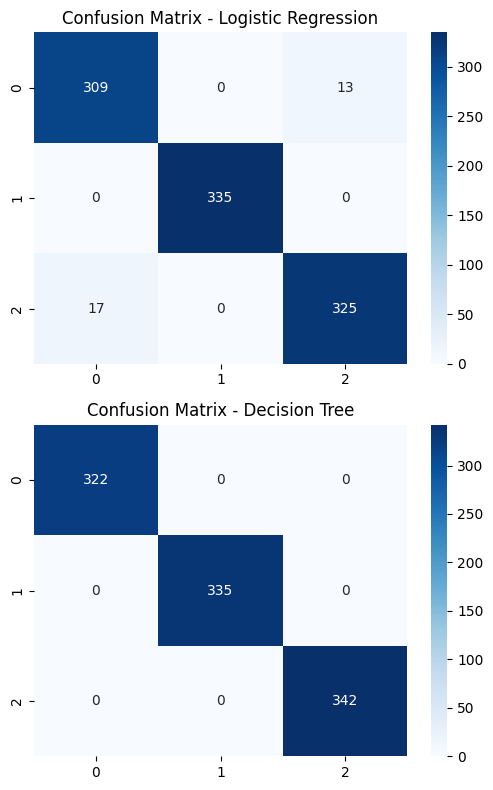

In [11]:
# Membuat confusion matrix untuk setiap model
conf_matrix_lr = confusion_matrix(y_test, lr_pred)
conf_matrix_dt = confusion_matrix(y_test, dt_pred)

# Visualisasi menggunakan heatmap
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")

plt.subplot(2, 2, 3)
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")

plt.tight_layout()
plt.show()


Hasil evaluasi dari kedua algoritma menunjukkan hasil yang positif dimana model **Logistic Regression** mendapatkan performa 0.970 untuk skor akurasi, presisi, recall, dan F1-score sedangkan model **Decision Tree** mendapatkan performa yang sempurna 1.0 untuk skor akurasi, presisi, recall, dan F1-score. Jadi dapat dikatakan model sudah menghasilkan performa yang sangat baik walaupun belum dilakukan proses tuning

In [12]:
#K-Fold Cross Validation (5 fold)
def print_kfold(model, X, y, model_name):
    kf = KFold(n_splits=5, shuffle = True, random_state = 42)
    accuracy_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    f1_scores = cross_val_score(model, X, y, cv=kf, scoring='f1_weighted')

    mean_accuracy = np.mean(accuracy_scores)
    mean_f1 = np.mean(f1_scores)

    print(f"Kfold {model_name}:")
    print(f"Akurasi dari setiap fold : {accuracy_scores}")
    print(f"Rata-rata Akurasi : {mean_accuracy:.3f}")
    print(f"F1-Score dari setiap fold : {f1_scores}")
    print(f"Rata-rata F1-Score : {mean_f1:.3f}\n")

print_kfold(lr_model, X, y, 'Logistic Regresion')
print_kfold(dt_model, X, y, 'Decision Tree')

Kfold Logistic Regresion:
Akurasi dari setiap fold : [0.96996997 0.96196196 0.95791583 0.96693387 0.95991984]
Rata-rata Akurasi : 0.963
F1-Score dari setiap fold : [0.96997433 0.96196715 0.95796104 0.96695637 0.95993485]
Rata-rata F1-Score : 0.963

Kfold Decision Tree:
Akurasi dari setiap fold : [1.         1.         0.99799599 1.         1.        ]
Rata-rata Akurasi : 1.000
F1-Score dari setiap fold : [1.         1.         0.99799635 1.         1.        ]
Rata-rata F1-Score : 1.000



Untuk memastikan model tidak overfitting saya melakukan evaluasi kembali menggunakan metode Kfold cross validation dengan nilai k=5 hasil evaluasi tersebut menunjukkan performa kedua model yang stabil dan tidak terlihat model overfitting atau underfitting. Kemudian dikarenakan performa model sudah sangat baik saya tidak melakukan proses tuning.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [14]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Setelah dilakukan proses pelatihan dan evaluasi, hasil evaluasi pada kedua model (Logistic Regresion dan Decision Tree) menunjukkan performa yang sangat baik dimana model **Decision Tree** memiliki performa yang lebih unggul yaitu 1.0 pada setiap metric evaluasi (akurasi, presisi, recall, dan f1-score) dibandingkan **Logistic Regression** yang mendapatkan nilai 0.970 pada setiap metric evaluasi. Selanjutnya untuk memastikan apakah model mengalami overfitting dilakukan evaluasi kembali menggunakan metode kfold cross validation dengan k=5, evaluasi tersebut menunjukkan performa kedua model yang stabil pada setiap fold dataset dengan hasil model **Decision Tree** (1.0 rata-rata nilai akurasi dan f1-score) tetap mengungguli model **Logistic Regression** (0.963 rata-rata nilai akurasi dan f1-score). Rekomendasi lanjutan terkait dataset ini adalah menambahkan lebih banyak fitur yang relevan dan jumlah dataset agar model bisa menangkap pola yang lebih kompleks, mengurangi bias, dan meningkatkan kemampuan model dalam generalisasi data yang belum pernah dilihat sebelumnya.